The goal of our project was to see the Boston housing data could reliably predict the median house price utilizing machine learning and Python. We also wanted to see if filtering out different values and inputs could help to improve the model’s efficiency and performance, and if we could manipulate the data to provide more accurate estimates.

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression

C:\Users\mattm\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mattm\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mattm\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mattm\anaconda3\envs\PythonData\lib\site-packages

Loading and Cleaning Data

First we had to import the data in our Jupyter Notebook, then we went about cleaning it. First we renamed the columns in our data set to be more intuitive, making sure we could read what we were looking at without confusion. Then we checked to see if any rows had null/blank values, which we did find several of. 

In [2]:
# Read csv using pandas. We should specify the column index to avoid mislabelling problems when data is uploaded
data=pd.read_csv('data/housingdata.csv',index_col=False)

In [3]:
# data.head to check the first few columns of the data set
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
# We rename the columns now using data.columns function
data.columns=['Crime Rate','Residential Land Zone','Non-retail business acres','Charles River Variable','Nitric Oxide Concentration',
             'Rooms','Age','Distance','Accessiblity to Highway','Tax Rate','Pupil-Teacher ratio','Proportion of Blacks','% lower status',
             'Median Value']

In [5]:
# data.head after renaming the columns
data.head()

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,Proportion of Blacks,% lower status,Median Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
# let's drop proportion of blacks
# We use data.drop to drop the proportion of blacks
data.drop("Proportion of Blacks",axis=1, inplace=True)

In [7]:
# data.head to verify
data.head()

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,% lower status,Median Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [8]:
# we use describe for sample stats and central tendency stats
data.describe()

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,% lower status,Median Value
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
# We use data.info to get the data types and count of non-nulls in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crime Rate                  486 non-null    float64
 1   Residential Land Zone       486 non-null    float64
 2   Non-retail business acres   486 non-null    float64
 3   Charles River Variable      486 non-null    float64
 4   Nitric Oxide Concentration  506 non-null    float64
 5   Rooms                       506 non-null    float64
 6   Age                         486 non-null    float64
 7   Distance                    506 non-null    float64
 8   Accessiblity to Highway     506 non-null    int64  
 9   Tax Rate                    506 non-null    int64  
 10  Pupil-Teacher ratio         506 non-null    float64
 11  % lower status              486 non-null    float64
 12  Median Value                506 non-null    float64
dtypes: float64(11), int64(2)
memory usa

In [10]:
# From the result above, we found out that there is a possibility of nulls or missing data which we can count by summing all nulls
# checking for nulls
data.isnull().any()

Crime Rate                     True
Residential Land Zone          True
Non-retail business acres      True
Charles River Variable         True
Nitric Oxide Concentration    False
Rooms                         False
Age                            True
Distance                      False
Accessiblity to Highway       False
Tax Rate                      False
Pupil-Teacher ratio           False
% lower status                 True
Median Value                  False
dtype: bool

At this point we had two thoughts on how to handle the null values. One was to simply drop the rows with null values and continue, and the other was imputation. Meaning adding in the median value of a given column in place of each null value. After discussing we decided to run the model we were building on both methods and see which performed better.

In [11]:
data_dropna = data.copy()
data_dropna = data_dropna.dropna()
#data.info()


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data.iloc[:,:]=imputer.fit_transform(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crime Rate                  506 non-null    float64
 1   Residential Land Zone       506 non-null    float64
 2   Non-retail business acres   506 non-null    float64
 3   Charles River Variable      506 non-null    float64
 4   Nitric Oxide Concentration  506 non-null    float64
 5   Rooms                       506 non-null    float64
 6   Age                         506 non-null    float64
 7   Distance                    506 non-null    float64
 8   Accessiblity to Highway     506 non-null    float64
 9   Tax Rate                    506 non-null    float64
 10  Pupil-Teacher ratio         506 non-null    float64
 11  % lower status              506 non-null    float64
 12  Median Value                506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 K

In [13]:
# Checking for nulls or missing values
data.isnull().any()

Crime Rate                    False
Residential Land Zone         False
Non-retail business acres     False
Charles River Variable        False
Nitric Oxide Concentration    False
Rooms                         False
Age                           False
Distance                      False
Accessiblity to Highway       False
Tax Rate                      False
Pupil-Teacher ratio           False
% lower status                False
Median Value                  False
dtype: bool

In [14]:
# Counting nulls or missing values
data.isnull().sum()

Crime Rate                    0
Residential Land Zone         0
Non-retail business acres     0
Charles River Variable        0
Nitric Oxide Concentration    0
Rooms                         0
Age                           0
Distance                      0
Accessiblity to Highway       0
Tax Rate                      0
Pupil-Teacher ratio           0
% lower status                0
Median Value                  0
dtype: int64

Analysis

Once we had cleaned up the data using both methodologies, we moved on to some early analysis. One of the first things we did was use a Seaborn Heatmap to see which metrics had high correlation with media house value.

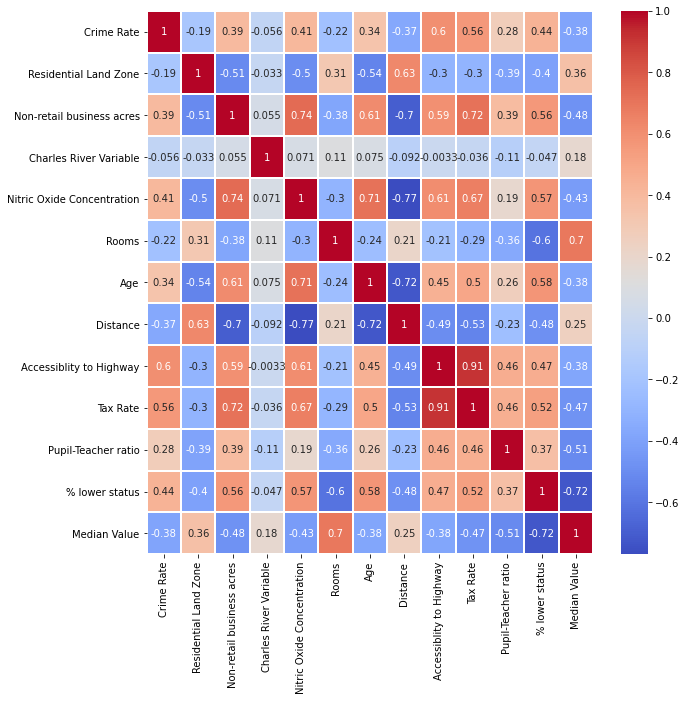

In [15]:
# Now, let's check for a correlation between the target value, which is our Median House price values, and all the other columns.
# Let's check then for a correlation to our median value (which of the variables are highly correlated to it?)
# We use seaborn heatmap. We should also consider the effects of outliers as well. But, let's check for correlation first
# Using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot = True,cmap= 'coolwarm', linewidths=1, linecolor='white',fmt='.2g')
plt.savefig("output/Seaborn.png")

Looking at the last column, we found out that the # of rooms (0.7) and % lower status (-0.74) have a strong correlation to the median house value. This means they directly influence the price. The correlation analysis shows that median house value is highly correlated to % lower status and the number of rooms per dwelling.
The total number of Rooms is positively correlated to Median Value. So as number of Rooms increases, the Median value increases. The opposite is true for % lower status: when % lower status goes up, the price goes down.

Stephs Code Here

# Export Dataframe to CSV

In [16]:
data.to_csv(r'data\revisedhousingdata.csv', index = False)

Once we had the correlation, we prepared several scatter plots to take a look at the highly correlated metrics compared against the house value in order to see how the data compared overall. 

In [17]:
data.head()
data['Home Value'] = (data['Median Value'] * 1000)
data.head()

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,% lower status,Median Value,Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,11.43,36.2,36200.0


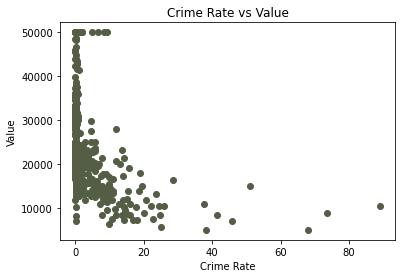

In [18]:
# Generate a scatter plot of Charles River Variable(distance from the river) vs. value
crimeRate = data.iloc[:,0]
value = data.iloc[:,13]

plt.scatter(crimeRate, value, color = '#545E45')

#label
plt.title('Crime Rate vs Value')
plt.xlabel('Crime Rate')
plt.ylabel('Value')
plt.show()

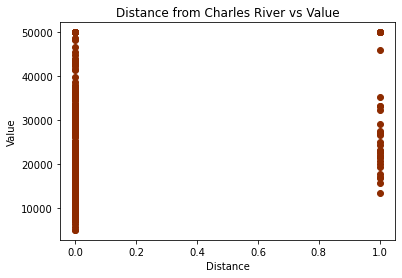

In [19]:
# Generate a scatter plot of Charles River Variable(distance from the river) vs. value
charlesRiver = data.iloc[:,3]
value = data.iloc[:,13]

plt.scatter(charlesRiver, value, color = '#8D2B00')

#label
plt.title('Distance from Charles River vs Value')
plt.xlabel('Distance')
plt.ylabel('Value')
plt.show()

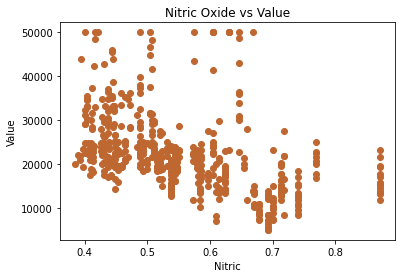

In [20]:
# Generate a scatter plot of Nitric Oxide Concentration vs. value
nitricOxide = data.iloc[:,4]
value = data.iloc[:,13]

plt.scatter(nitricOxide, value, color = '#BE6731')

#label
plt.title('Nitric Oxide vs Value')
plt.xlabel('Nitric')
plt.ylabel('Value')
plt.savefig("output/NitricOxideVsValue.png")
plt.show()

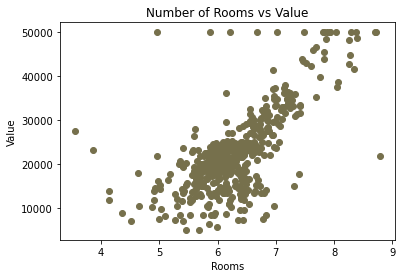

In [21]:
# Generate a scatter plot of rooms vs. value
rooms = data.iloc[:,5]
value = data.iloc[:,13]

plt.scatter(rooms, value, color = '#76704C')


#label
plt.title('Number of Rooms vs Value')
plt.xlabel('Rooms')
plt.ylabel('Value')
plt.savefig("output/NumberOfRoomsVsValue.png")
plt.show()

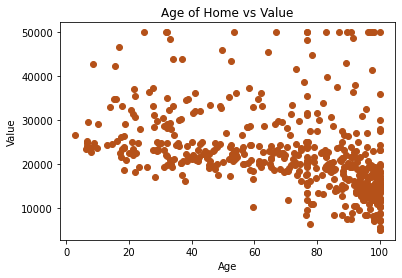

In [22]:
# Generate a scatter plot of age vs. value
age = data.iloc[:,6]
value = data.iloc[:,13]

plt.scatter(age, value, color = '#B55119')

#label
plt.title('Age of Home vs Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.savefig("output/AgeVsValue.png")
plt.show()

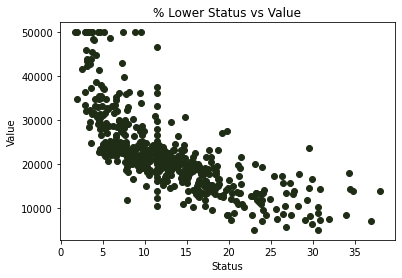

In [23]:
# Generate a scatter plot of % lower status vs. value
lowerStatus = data.iloc[:,11]
value = data.iloc[:,13]

plt.scatter(lowerStatus, value, color = '#1F2D16')

#label
plt.title('% Lower Status vs Value')
plt.xlabel('Status')
plt.ylabel('Value')
plt.savefig("output/StatusVsValue.png")
plt.show()

Building The Model

After our exploratory analysis we started to work on our model. After discussing our data with our instructor Dom, we went with a multiple linear regression neural network using MSE (Mean Squared Error) and R Squared Score to rate the models efficacy at his suggestion.

After researching how to modify a neural network to fit our needs, we went with a sequential model using relu activation for the analysis and had a single output node using linear activation. As suggested, we had the model use mean squared error as the primary output in order to help us troubleshoot and get a rough gauge of the models performance.

It was at this point we realized we had not yet standardized our data, which is a general best practice due to the different ways our data is being measured which makes comparison difficult. Instead of just standardizing it we decided to compare pre/post standardization model performance in order to quantify the level of impact that standardization would have.

Initial Model Before Standardizing Data

In [24]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# Assign the data to X and y
X = data[['Crime Rate','Residential Land Zone','Non-retail business acres','Charles River Variable','Nitric Oxide Concentration',
             'Rooms','Age','Distance','Accessiblity to Highway','Tax Rate','Pupil-Teacher ratio','% lower status']]
y = data['Median Value'].values.reshape(-1,1)
print(X.shape, y.shape)

(506, 12) (506, 1)


In [26]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=150)
print(X_train.shape)
print(X_test.shape)

(379, 12)
(127, 12)


In [27]:
#Creating the model
model = Sequential()
model.add(Dense(36, input_dim=12, activation= "relu"))
model.add(Dense(1, activation='linear'))

In [28]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
379/379 [==============================] - 0s 247us/step - loss: 256.8646 - mean_squared_error: 256.8646
Epoch 2/100
379/379 [==============================] - 0s 26us/step - loss: 193.1096 - mean_squared_error: 193.1096
Epoch 3/100
379/379 [==============================] - 0s 26us/step - loss: 144.5562 - mean_squared_error: 144.5562
Epoch 4/100
379/379 [==============================] - 0s 32us/step - loss: 122.8385 - mean_squared_error: 122.8385
Epoch 5/100
379/379 [==============================] - 0s 29us/step - loss: 112.0496 - mean_squared_error: 112.0496
Epoch 6/100
379/379 [==============================] - 0s 29us/step - loss: 102.7267 - mean_squared_error: 102.7267
Epoch 7/100
379/379 [==============================] - 0s 24us/step - loss: 95.2153 - mean_squared_error: 95.2153
Epoch 8/100
379/379 [==============================] - 0s 29us/step - loss: 90.5148 - mean_squared_error: 90.5148
Epoch 9/100
379/379 [==============================] - 0s 37us/step - loss

379/379 [==============================] - 0s 21us/step - loss: 50.9364 - mean_squared_error: 50.9364
Epoch 71/100
379/379 [==============================] - 0s 37us/step - loss: 48.7295 - mean_squared_error: 48.7295
Epoch 72/100
379/379 [==============================] - 0s 29us/step - loss: 49.4514 - mean_squared_error: 49.4514
Epoch 73/100
379/379 [==============================] - 0s 37us/step - loss: 48.1488 - mean_squared_error: 48.1488
Epoch 74/100
379/379 [==============================] - 0s 37us/step - loss: 48.8130 - mean_squared_error: 48.8130
Epoch 75/100
379/379 [==============================] - 0s 26us/step - loss: 47.2664 - mean_squared_error: 47.2664
Epoch 76/100
379/379 [==============================] - 0s 34us/step - loss: 49.7918 - mean_squared_error: 49.7918
Epoch 77/100
379/379 [==============================] - 0s 29us/step - loss: 47.3969 - mean_squared_error: 47.3969
Epoch 78/100
379/379 [==============================] - 0s 34us/step - loss: 46.7678 - mean_s

In [29]:
# Make a test preciction to see if we're on the right track
row = 3
test_row = X_test.iloc[row, :]
test_row_array = np.array(test_row).reshape(1, 12)
test_row_array.shape

print(f'Prediction = {model.predict(test_row_array)}')
print(f'Actual = {y_test[row]}')

Prediction = [[16.523676]]
Actual = [19.3]


In [30]:
#Use X_test to predict y, and use that to calculate our R score
y_test_predict = model.predict(X_test)
r2_score(y_test, y_test_predict)

0.48472051272337024

In [31]:
model.evaluate(X_test,y_test, verbose=2)

[24.63551920793188, 24.63551902770996]

The R2 score for our model is not very reliable at a .37 which would put it in the higher of the of low reliability range for a model. Next we will standarize our data and then see if that improves our R score.

Model With Standardized Data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [34]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [35]:
model_scaled = Sequential()
model_scaled.add(Dense(36, input_dim=12, activation= "relu"))
model_scaled.add(Dense(1, activation='linear'))

model_scaled.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_scaled.fit(X_train_scaled, y_train_scaled, epochs=100)

#r2_score(y_train_scaled, y_test_scaled)

Epoch 1/100
379/379 [==============================] - 0s 213us/step - loss: 1.6213 - mean_squared_error: 1.6213
Epoch 2/100
379/379 [==============================] - 0s 26us/step - loss: 1.0910 - mean_squared_error: 1.0910
Epoch 3/100
379/379 [==============================] - 0s 26us/step - loss: 0.8280 - mean_squared_error: 0.8280
Epoch 4/100
379/379 [==============================] - 0s 26us/step - loss: 0.7044 - mean_squared_error: 0.7044
Epoch 5/100
379/379 [==============================] - 0s 26us/step - loss: 0.6099 - mean_squared_error: 0.6099
Epoch 6/100
379/379 [==============================] - 0s 29us/step - loss: 0.5336 - mean_squared_error: 0.5336
Epoch 7/100
379/379 [==============================] - 0s 29us/step - loss: 0.4741 - mean_squared_error: 0.4741
Epoch 8/100
379/379 [==============================] - 0s 30us/step - loss: 0.4229 - mean_squared_error: 0.4229
Epoch 9/100
379/379 [==============================] - 0s 26us/step - loss: 0.3837 - mean_squared_error

379/379 [==============================] - 0s 28us/step - loss: 0.0991 - mean_squared_error: 0.0991
Epoch 74/100
379/379 [==============================] - 0s 32us/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 75/100
379/379 [==============================] - 0s 24us/step - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 76/100
379/379 [==============================] - 0s 24us/step - loss: 0.0972 - mean_squared_error: 0.0972
Epoch 77/100
379/379 [==============================] - 0s 26us/step - loss: 0.0972 - mean_squared_error: 0.0972
Epoch 78/100
379/379 [==============================] - 0s 29us/step - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 79/100
379/379 [==============================] - 0s 21us/step - loss: 0.0973 - mean_squared_error: 0.0973
Epoch 80/100
379/379 [==============================] - 0s 24us/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 81/100
379/379 [==============================] - 0s 25us/step - loss: 0.0955 - mean_squared_error: 0.0

In [36]:
#Use X_test to predict y, and use that to calculate our R score
y_test_scaled_predict = model_scaled.predict(X_test_scaled)
r2_score(y_test_scaled, y_test_scaled_predict)

0.7561127352801249

In [37]:
#Evaluate the model
model_scaled.evaluate(X_test_scaled,y_test_scaled, verbose=2)

[0.1219026872257548, 0.12190268933773041]

There was a stark difference between the two models, showing that standardizing the data clearly improved performance of the model with the MSE decreasing considerably, and the R2 score improving majorly.

Tinkering with the Data

Once we standardized the data we took a look to see if removing some columns of data would help to improve the performance of the model. Looking at our Seaborn Heatmap we saw that both the Charles River and Distance inputs has very low correlation to house value. We dropped those two columns from our data, and created a new model using the same criteria to measure the overall impact on performance.


In [38]:
manipulated_data = data.copy()

manipulated_data = manipulated_data.drop(["Charles River Variable", 'Distance'],axis=1)
manipulated_data.head()

,Crime Rate,Residential Land Zone,Non-retail business acres,Nitric Oxide Concentration,Rooms,Age,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,% lower status,Median Value,Home Value
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,4.98,24.0,24000.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,9.14,21.6,21600.0
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,4.03,34.7,34700.0
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,2.94,33.4,33400.0
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,11.43,36.2,36200.0


In [39]:
X_manipulated = manipulated_data[['Crime Rate','Residential Land Zone','Non-retail business acres','Nitric Oxide Concentration',
             'Rooms','Age','Accessiblity to Highway','Tax Rate','Pupil-Teacher ratio','% lower status']]
y_manipulated = manipulated_data['Median Value'].values.reshape(-1,1)
#print(X.shape, y.shape)

X_train_manipulated, X_test_manipulated, y_train_manipulated, y_test_manipulated = train_test_split(X_manipulated, y_manipulated, random_state=150)
#print(X_train.shape)
#print(X_test.shape)

In [40]:
X_scaler_manipulated = StandardScaler().fit(X_train_manipulated)
y_scaler_manipulated = StandardScaler().fit(y_train_manipulated)

X_train_scaled_manipulated = X_scaler_manipulated.transform(X_train_manipulated)
X_test_scaled_manipulated = X_scaler_manipulated.transform(X_test_manipulated)
y_train_scaled_manipulated = y_scaler_manipulated.transform(y_train_manipulated)
y_test_scaled_manipulated = y_scaler_manipulated.transform(y_test_manipulated)

model_manipulated = Sequential()
model_manipulated.add(Dense(30, input_dim=10, activation= "relu"))

model_manipulated.add(Dense(1, activation='linear'))

model_manipulated.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_manipulated.fit(X_train_scaled_manipulated, y_train_scaled_manipulated, epochs=100)

model_manipulated.evaluate(X_test_scaled_manipulated,y_test_scaled_manipulated, verbose=2)

Epoch 1/100
379/379 [==============================] - 0s 221us/step - loss: 0.7852 - mean_squared_error: 0.7852
Epoch 2/100
379/379 [==============================] - 0s 32us/step - loss: 0.5929 - mean_squared_error: 0.5929
Epoch 3/100
379/379 [==============================] - 0s 24us/step - loss: 0.4908 - mean_squared_error: 0.4908
Epoch 4/100
379/379 [==============================] - 0s 29us/step - loss: 0.4304 - mean_squared_error: 0.4304
Epoch 5/100
379/379 [==============================] - 0s 26us/step - loss: 0.3892 - mean_squared_error: 0.3892
Epoch 6/100
379/379 [==============================] - 0s 26us/step - loss: 0.3593 - mean_squared_error: 0.3593
Epoch 7/100
379/379 [==============================] - 0s 24us/step - loss: 0.3332 - mean_squared_error: 0.3332
Epoch 8/100
379/379 [==============================] - 0s 25us/step - loss: 0.3147 - mean_squared_error: 0.3147
Epoch 9/100
379/379 [==============================] - 0s 32us/step - loss: 0.2970 - mean_squared_error

379/379 [==============================] - 0s 26us/step - loss: 0.1168 - mean_squared_error: 0.1168
Epoch 74/100
379/379 [==============================] - 0s 34us/step - loss: 0.1161 - mean_squared_error: 0.1161
Epoch 75/100
379/379 [==============================] - 0s 32us/step - loss: 0.1155 - mean_squared_error: 0.1155
Epoch 76/100
379/379 [==============================] - 0s 32us/step - loss: 0.1153 - mean_squared_error: 0.1153
Epoch 77/100
379/379 [==============================] - 0s 24us/step - loss: 0.1150 - mean_squared_error: 0.1150
Epoch 78/100
379/379 [==============================] - 0s 28us/step - loss: 0.1161 - mean_squared_error: 0.1161
Epoch 79/100
379/379 [==============================] - 0s 34us/step - loss: 0.1146 - mean_squared_error: 0.1146
Epoch 80/100
379/379 [==============================] - 0s 29us/step - loss: 0.1139 - mean_squared_error: 0.1139
Epoch 81/100
379/379 [==============================] - 0s 26us/step - loss: 0.1136 - mean_squared_error: 0.1

[0.11887075053894613, 0.11887075006961823]

In [41]:
#Use X_test to predict y, and use that to calculate our R score
y_test_scaled_manip_predict = model_manipulated.predict(X_test_scaled_manipulated)
r2_score(y_test_scaled_manipulated, y_test_scaled_manip_predict)

0.7621786464535047

We found removing those two columns did have a mild impact on performance, however upon repeated running of the model we found that the results would change seemingly at random. This led us to believe that removing the two columns was not meaningfully different.

Next we tried selected the top 6 columns based on correlation to see if hand selecting the data would be more beneficial. We went Non-retail business acres, Nitric Oxide Concentration, Rooms, Tax Rate, Pupil-Teacher ratio, % lower status as our columns.

In [42]:
X_cherrypicked = data[['Non-retail business acres','Nitric Oxide Concentration',
             'Rooms','Tax Rate','Pupil-Teacher ratio','% lower status']]
y_cherrypicked = data['Median Value'].values.reshape(-1,1)
#print(X.shape, y.shape)

X_train_cherrypicked, X_test_cherrypicked, y_train_cherrypicked, y_test_cherrypicked = train_test_split(X_cherrypicked, y_cherrypicked, random_state=150)
#print(X_train.shape)
#print(X_test.shape)

In [43]:
X_scaler_cherrypicked = StandardScaler().fit(X_train_cherrypicked)
y_scaler_cherrypicked = StandardScaler().fit(y_train_cherrypicked)

X_train_scaled_cherrypicked = X_scaler_cherrypicked.transform(X_train_cherrypicked)
X_test_scaled_cherrypicked = X_scaler_cherrypicked.transform(X_test_cherrypicked)
y_train_scaled_cherrypicked = y_scaler_cherrypicked.transform(y_train_cherrypicked)
y_test_scaled_cherrypicked = y_scaler_cherrypicked.transform(y_test_cherrypicked)

model_cherrypicked = Sequential()
model_cherrypicked.add(Dense(18, input_dim=6, activation= "relu"))
model_cherrypicked.add(Dense(1, activation='linear'))

model_cherrypicked.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_cherrypicked.fit(X_train_scaled_cherrypicked, y_train_scaled_cherrypicked, epochs=100)

model_cherrypicked.evaluate(X_test_scaled_cherrypicked,y_test_scaled_cherrypicked, verbose=2)

Epoch 1/100
379/379 [==============================] - 0s 237us/step - loss: 1.1019 - mean_squared_error: 1.1019
Epoch 2/100
379/379 [==============================] - 0s 26us/step - loss: 0.8970 - mean_squared_error: 0.8970
Epoch 3/100
379/379 [==============================] - 0s 26us/step - loss: 0.7474 - mean_squared_error: 0.7474
Epoch 4/100
379/379 [==============================] - 0s 24us/step - loss: 0.6327 - mean_squared_error: 0.6327
Epoch 5/100
379/379 [==============================] - 0s 26us/step - loss: 0.5519 - mean_squared_error: 0.5519
Epoch 6/100
379/379 [==============================] - 0s 29us/step - loss: 0.4922 - mean_squared_error: 0.4922
Epoch 7/100
379/379 [==============================] - 0s 26us/step - loss: 0.4438 - mean_squared_error: 0.4438
Epoch 8/100
379/379 [==============================] - 0s 29us/step - loss: 0.4072 - mean_squared_error: 0.4072
Epoch 9/100
379/379 [==============================] - 0s 26us/step - loss: 0.3767 - mean_squared_error

379/379 [==============================] - 0s 29us/step - loss: 0.1553 - mean_squared_error: 0.1553
Epoch 74/100
379/379 [==============================] - 0s 26us/step - loss: 0.1550 - mean_squared_error: 0.1550
Epoch 75/100
379/379 [==============================] - ETA: 0s - loss: 0.1245 - mean_squared_error: 0.12 - 0s 24us/step - loss: 0.1543 - mean_squared_error: 0.1543
Epoch 76/100
379/379 [==============================] - 0s 26us/step - loss: 0.1538 - mean_squared_error: 0.1538
Epoch 77/100
379/379 [==============================] - 0s 26us/step - loss: 0.1535 - mean_squared_error: 0.1535
Epoch 78/100
379/379 [==============================] - 0s 29us/step - loss: 0.1533 - mean_squared_error: 0.1533
Epoch 79/100
379/379 [==============================] - 0s 24us/step - loss: 0.1524 - mean_squared_error: 0.1524
Epoch 80/100
379/379 [==============================] - 0s 24us/step - loss: 0.1521 - mean_squared_error: 0.1521
Epoch 81/100
379/379 [==============================] - 0

[0.11926628402837618, 0.11926628649234772]

In [44]:
#Use X_test to predict y, and use that to calculate our R score
y_test_scaled_cherrypicked_predict = model_cherrypicked.predict(X_test_scaled_cherrypicked)
r2_score(y_test_scaled_cherrypicked, y_test_scaled_cherrypicked_predict)

0.7613873115579937

Again, we saw the results of the test change upon running them, with only slight differences in performance. After seeing similar changes to simply dropping the two columns, it seemed wiser to keep the data set as is, in order to preserve the integrity of our data set.
Next we decided to compare the data set cleaning methods we used. 

Below is a model using a data set where we instead drop the rows contianing nulls.

In [45]:
data_dropna

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,% lower status,Median Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


In [46]:
X_drop = data_dropna[['Crime Rate','Residential Land Zone','Non-retail business acres','Charles River Variable','Nitric Oxide Concentration',
             'Rooms','Age','Distance','Accessiblity to Highway','Tax Rate','Pupil-Teacher ratio','% lower status']]
y_drop = data_dropna['Median Value'].values.reshape(-1,1)

X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop, y_drop, random_state=150)

X_scaler_drop = StandardScaler().fit(X_train_drop)
y_scaler_drop = StandardScaler().fit(y_train_drop)

X_train_scaled_drop = X_scaler_drop.transform(X_train_drop)
X_test_scaled_drop = X_scaler_drop.transform(X_test_drop)
y_train_scaled_drop = y_scaler_drop.transform(y_train_drop)
y_test_scaled_drop = y_scaler_drop.transform(y_test_drop)

model_drop = Sequential()
model_drop.add(Dense(36, input_dim=12, activation= "relu"))
model_drop.add(Dense(1, activation='linear'))

model_drop.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_drop.fit(X_train_scaled_drop, y_train_scaled_drop, epochs=100)

model_drop.evaluate(X_test_scaled_drop,y_test_scaled_drop, verbose=2)

Epoch 1/100
295/295 [==============================] - 0s 308us/step - loss: 1.6476 - mean_squared_error: 1.6476
Epoch 2/100
295/295 [==============================] - 0s 37us/step - loss: 1.1908 - mean_squared_error: 1.1908
Epoch 3/100
295/295 [==============================] - 0s 34us/step - loss: 0.8984 - mean_squared_error: 0.8984
Epoch 4/100
295/295 [==============================] - 0s 27us/step - loss: 0.7085 - mean_squared_error: 0.7085
Epoch 5/100
295/295 [==============================] - 0s 34us/step - loss: 0.5858 - mean_squared_error: 0.5858
Epoch 6/100
295/295 [==============================] - 0s 37us/step - loss: 0.4960 - mean_squared_error: 0.4960
Epoch 7/100
295/295 [==============================] - 0s 34us/step - loss: 0.4344 - mean_squared_error: 0.4344
Epoch 8/100
295/295 [==============================] - 0s 34us/step - loss: 0.3909 - mean_squared_error: 0.3909
Epoch 9/100
295/295 [==============================] - 0s 30us/step - loss: 0.3565 - mean_squared_error

295/295 [==============================] - 0s 27us/step - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 74/100
295/295 [==============================] - 0s 34us/step - loss: 0.1174 - mean_squared_error: 0.1174
Epoch 75/100
295/295 [==============================] - 0s 32us/step - loss: 0.1176 - mean_squared_error: 0.1176
Epoch 76/100
295/295 [==============================] - 0s 27us/step - loss: 0.1163 - mean_squared_error: 0.1163
Epoch 77/100
295/295 [==============================] - 0s 30us/step - loss: 0.1163 - mean_squared_error: 0.1163
Epoch 78/100
295/295 [==============================] - 0s 34us/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 79/100
295/295 [==============================] - 0s 30us/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 80/100
295/295 [==============================] - 0s 30us/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 81/100
295/295 [==============================] - 0s 30us/step - loss: 0.1139 - mean_squared_error: 0.1

[0.08022855041605054, 0.08022855222225189]

In [47]:
y_test_scaled_predict_drop = model_drop.predict(X_test_scaled_drop)
r2_score(y_test_scaled_drop, y_test_scaled_predict_drop)

0.9164052653634059

We had assumed that providing additional inputs using the imputation method would actually improve the models performance, but we found that wasn’t the case at all. The data set where we had dropped all null values had a much higher R2 score and a lower MSE. 

Lastly we wanted to compare what the performance looked like if we removed the outliers from the dataset. For this analysis we used the drop NA data since it was more accurate.

In [48]:
from scipy import stats

data_remove_outliers = data_dropna.copy()
data_remove_outliers = data_remove_outliers[(np.abs(stats.zscore(data_remove_outliers)) < 3).all(axis=1)]
data_remove_outliers

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,% lower status,Median Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


In [49]:
X_outlier = data_remove_outliers[['Crime Rate','Residential Land Zone','Non-retail business acres','Charles River Variable','Nitric Oxide Concentration',
             'Rooms','Age','Distance','Accessiblity to Highway','Tax Rate','Pupil-Teacher ratio','% lower status']]
y_outlier = data_remove_outliers['Median Value'].values.reshape(-1,1)

X_train_outlier, X_test_outlier, y_train_outlier, y_test_outlier = train_test_split(X_outlier, y_outlier, random_state=150)

X_scaler_outlier = StandardScaler().fit(X_train_outlier)
y_scaler_outlier = StandardScaler().fit(y_train_outlier)

X_train_scaled_outlier = X_scaler_outlier.transform(X_train_outlier)
X_test_scaled_outlier = X_scaler_outlier.transform(X_test_outlier)
y_train_scaled_outlier = y_scaler_outlier.transform(y_train_outlier)
y_test_scaled_outlier = y_scaler_outlier.transform(y_test_outlier)

model_outlier = Sequential()
model_outlier.add(Dense(36, input_dim=12, activation= "relu"))
model_outlier.add(Dense(1, activation='linear'))

model_outlier.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_outlier.fit(X_train_scaled_outlier, y_train_scaled_outlier, epochs=100)

model_drop.evaluate(X_test_scaled_drop,y_test_scaled_drop, verbose=2)

Epoch 1/100
252/252 [==============================] - 0s 408us/step - loss: 2.0515 - mean_squared_error: 2.0515
Epoch 2/100
252/252 [==============================] - 0s 36us/step - loss: 1.3743 - mean_squared_error: 1.3743
Epoch 3/100
252/252 [==============================] - 0s 28us/step - loss: 0.9390 - mean_squared_error: 0.9390
Epoch 4/100
252/252 [==============================] - 0s 36us/step - loss: 0.6667 - mean_squared_error: 0.6667
Epoch 5/100
252/252 [==============================] - 0s 36us/step - loss: 0.5355 - mean_squared_error: 0.5355
Epoch 6/100
252/252 [==============================] - 0s 36us/step - loss: 0.4473 - mean_squared_error: 0.4473
Epoch 7/100
252/252 [==============================] - 0s 28us/step - loss: 0.3985 - mean_squared_error: 0.3985
Epoch 8/100
252/252 [==============================] - 0s 32us/step - loss: 0.3549 - mean_squared_error: 0.3549
Epoch 9/100
252/252 [==============================] - 0s 32us/step - loss: 0.3201 - mean_squared_error

252/252 [==============================] - 0s 36us/step - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 74/100
252/252 [==============================] - 0s 28us/step - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 75/100
252/252 [==============================] - 0s 36us/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 76/100
252/252 [==============================] - 0s 36us/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 77/100
252/252 [==============================] - 0s 28us/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 78/100
252/252 [==============================] - 0s 36us/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 79/100
252/252 [==============================] - 0s 32us/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 80/100
252/252 [==============================] - 0s 28us/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 81/100
252/252 [==============================] - 0s 36us/step - loss: 0.0999 - mean_squared_error: 0.0

[0.08022855041605054, 0.08022855222225189]

In [50]:
y_test_scaled_predict_outlier = model_outlier.predict(X_test_scaled_outlier)
r2_score(y_test_scaled_outlier, y_test_scaled_predict_outlier)


0.8933453981257239

After which we saw that removing outliers did not significantly move the needly on either the MSE or R2 score. 

Conclusion.

With our model getting a MSE of 0.10 and a R2 score of 0.90 we found that the model could be used to somewhat accurately predict the value of a house based on the provided inputs. We also found that our attempts at manipulating the data proved ultimately proved counter productive as each time we manipulated the data it either had no change, or hurt performance of our model. With the only exception being the standardization of the model.
